**Звіт про виконання лабораторної роботи №1 з дисципліни «Цифрова обробка аудіоданих»**

Виконав: студент 4 курсу, групи ДА-11 Фороща Владислав

**тема роботи**: “Дослідження мовного сигналу в часовій області”

**мета роботи**: навчитися записувати аудіо сигнал в цифровій формі,
визначати такі параметри сигналу як: тривалість, частота, період, відношення
сигнал/шум.

Для роботи встановимо наступний модуль

In [247]:
import os
import requests

if not os.path.exists('thinkdsp.py'):
    url = 'https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py'
    response = requests.get(url)
    with open('thinkdsp.py', 'wb') as f:
        f.write(response.content)

In [248]:
import thinkdsp
from thinkdsp import read_wave
import numpy as np
import matplotlib.pyplot as plt

Далі записуємо своє прізвище, ім'я та по-батькові за допомогою онлайн ресурсу і конвертуємо його у формат wav із наступними налаштуваннями:

Частота дискредитації - 22050 Гц
Розрядність - 16 біт

![Конвертація](assets/conversion_params.png)

Завантажимо файл

In [249]:
wave = read_wave('./assets/pib_converted.wav')

Його можна прослухати:

In [250]:
wave.make_audio()

Виведемо параметри звукового файлу:

In [251]:
# Параметри дискретизації
frequency = wave.framerate
period = 1 / frequency
time = wave.duration
num = int(frequency / period)
bitnum = 16

# Інформаційні характеристики
speed = frequency * bitnum
volume = speed * time / (8 * 1024 * 1024)

print(f"Тривалість: {time} секунд")
print(f"Період дискретизації: {period} секунд")
print(f"Частота дискретизації: {frequency} Гц")
print(f"Кількість дискретів: {num}")
print(f"Розрядність: {bitnum} біт")

print(f"Швидкість потоку даних: {speed} біт/с")
print(f"Об'єм даних: {volume:.2f} Мбайт")

Тривалість: 7.338684807256236 секунд
Період дискретизації: 4.5351473922902495e-05 секунд
Частота дискретизації: 22050 Гц
Кількість дискретів: 486202500
Розрядність: 16 біт
Швидкість потоку даних: 352800 біт/с
Об'єм даних: 0.31 Мбайт


Виведемо графік аудіосигналу

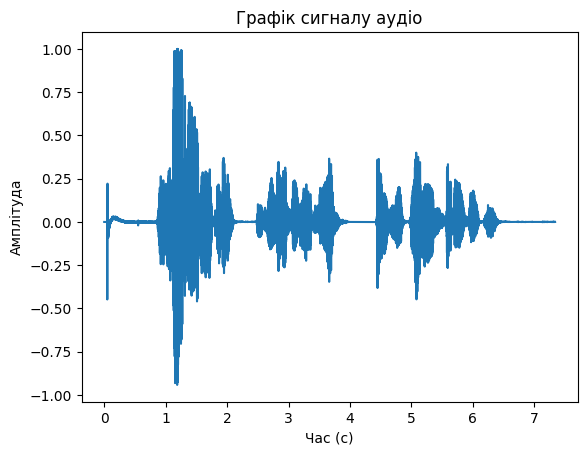

In [252]:
wave.plot()
plt.title("Графік сигналу аудіо")
plt.ylabel("Амплітуда")
plt.xlabel("Час (c)")
plt.show()

In [253]:
segment = wave.segment(start=0.845, duration=0.185)
segment.make_audio()

Вручну визначимо інтервали складів та літер у ПІБ:

In [265]:
syllable_intervals = {
    "Фо": (0.845, 1.27),
    "ро": (1.27, 1.55),
    "ща": (1.55, 2.1),

    "Вла": (2.5, 2.98),
    "дис": (3, 3.4),
    "лав": (3.4, 3.97),

    "О": (4.42, 4.6),
    "ле": (4.65, 4.97),
    "ксан": (4.97, 5.47),
    "дро": (5.47, 5.89),
    "вич": (5.89, 6.44)
}

letter_intervals = {
    "Ф": (0.845, 1.12),
    "о": (1.12, 1.27),
    "р": (1.27, 1.38),
    "о ": (1.38, 1.55),
    "щ": (1.55, 1.91),
    "а": (1.95, 2.1),

    "В": (2.5, 2.65),
    "л": (2.68, 2.83),
    "а ": (2.83, 2.98),
    "д": (3, 3.12),
    "и": (3.12, 3.175),
    "с": (3.175, 3.4),
    "л ": (3.4, 3.52),
    "а  ": (3.52, 3.77),
    "в": (3.77, 3.97),

    "О": (4.42, 4.6),
    "л  ": (4.65, 4.76),
    "е": (4.76, 4.97),
    "к": (4.97, 5.005),
    "с ": (5.005, 5.175),
    "а   ": (5.175, 5.355),
    "н": (5.355, 5.47),
    "д ": (5.47, 5.58),
    "р ": (5.59, 5.71),
    "о  ": (5.71, 5.89),
    "в ": (5.89, 5.99),
    "и ": (5.99, 6.205),
    "ч": (6.205, 6.44)
}

Кожен склад та літеру виділимо в окремий сегмент та розрахуємо метрики:

Склад 'Фо': RMS шум = 0.2318307477397323


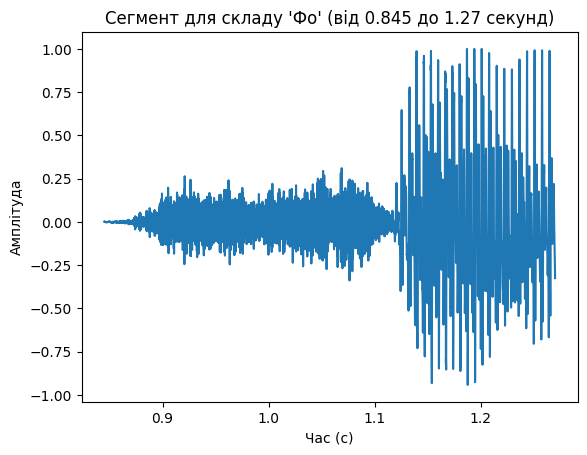

Склад 'ро': RMS шум = 0.184761755658549


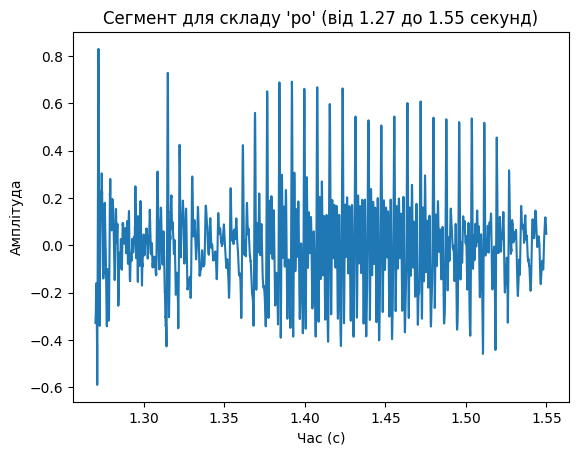

Склад 'ща': RMS шум = 0.07994847527528531


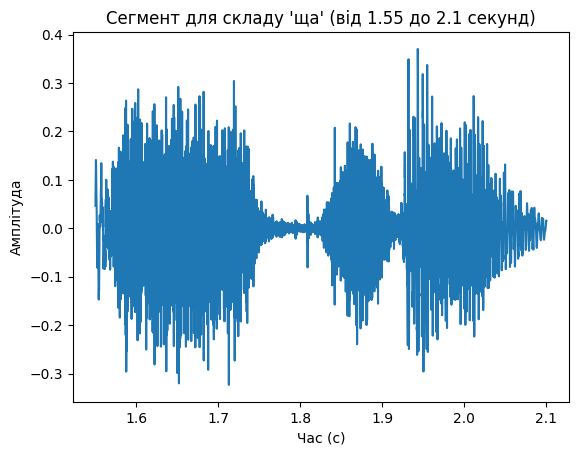

Склад 'Вла': RMS шум = 0.0825024467309949


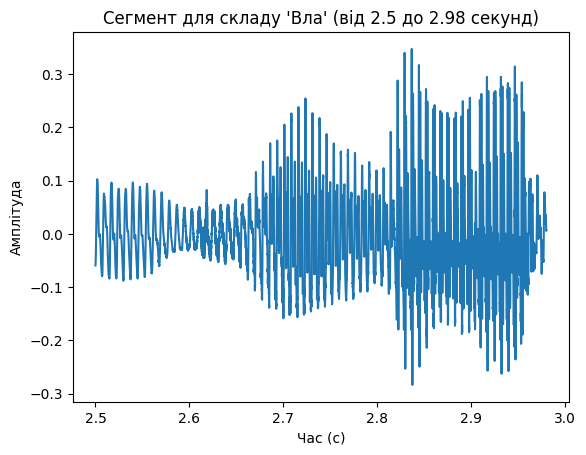

Склад 'дис': RMS шум = 0.05223164913100791


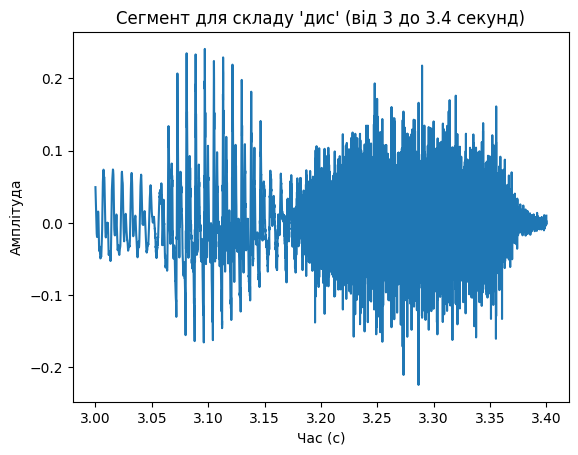

Склад 'лав': RMS шум = 0.05158798661749773


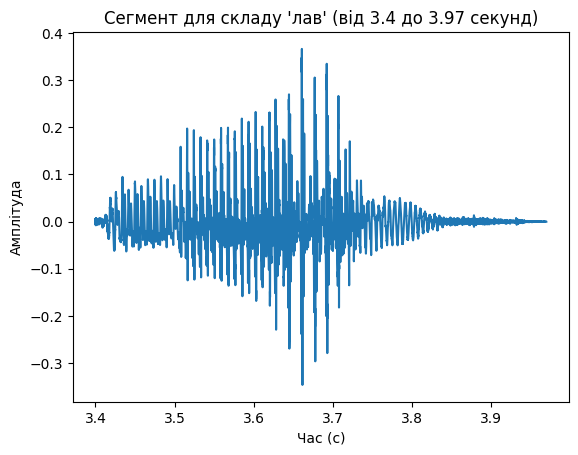

Склад 'О': RMS шум = 0.09922004413094154


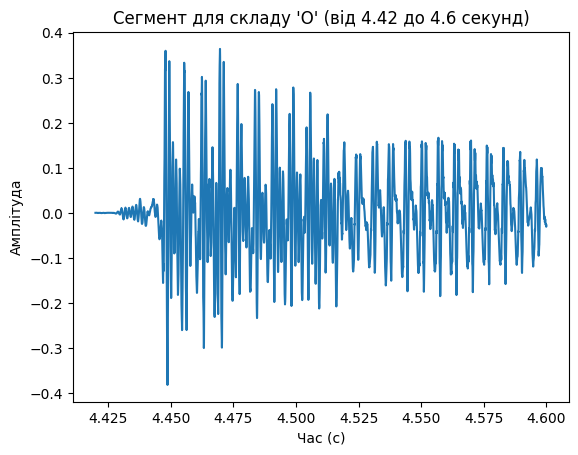

Склад 'ле': RMS шум = 0.04205338990668764


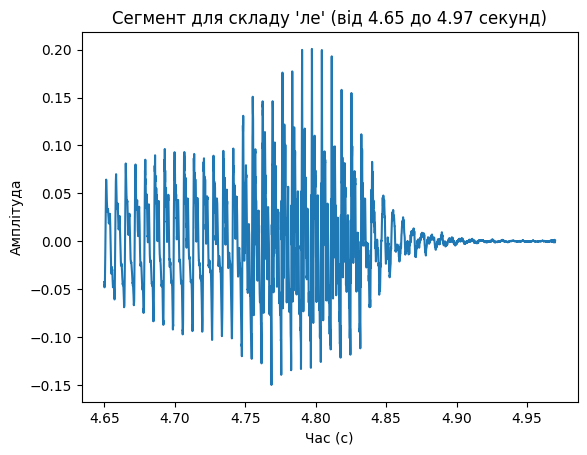

Склад 'ксан': RMS шум = 0.0815610249194031


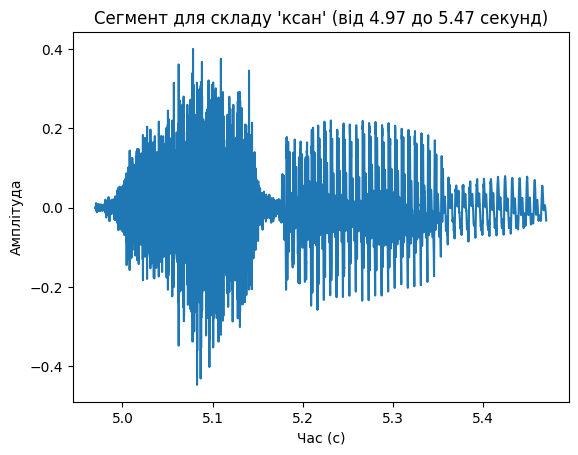

Склад 'дро': RMS шум = 0.051921536491816536


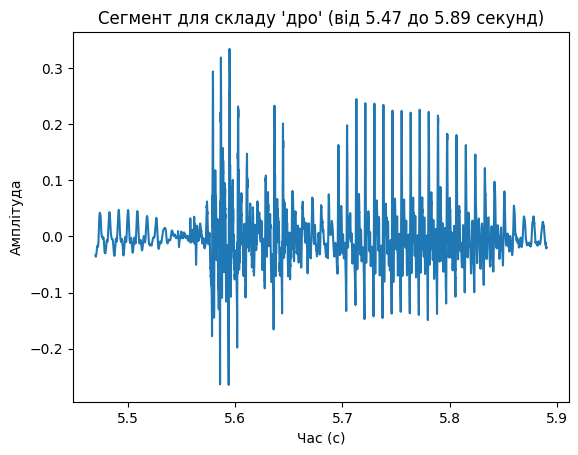

Склад 'вич': RMS шум = 0.02975972611970581


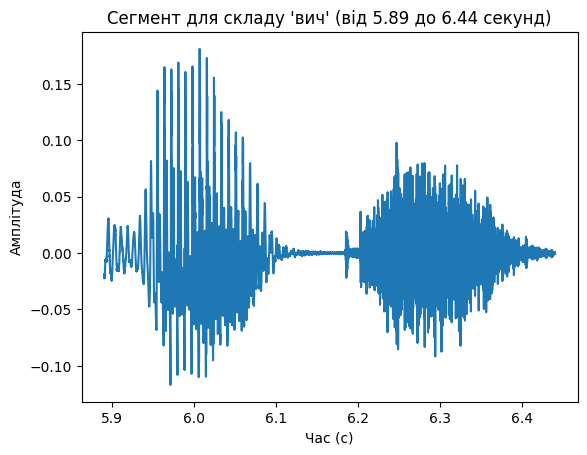

In [266]:
for syllable, (start, end) in syllable_intervals.items():
    segment = wave.segment(start=start, duration=(end - start))
    rms_noise = np.sqrt(np.mean(segment.ys**2))
    print(f"Склад '{syllable}': RMS шум = {rms_noise}")

    segment.plot()
    plt.ylabel("Амплітуда")
    plt.xlabel("Час (c)")
    plt.title(f"Сегмент для складу '{syllable}' (від {start} до {end} секунд)")
    plt.show()

Літера 'Ф': RMS шум = 0.06927154343143713


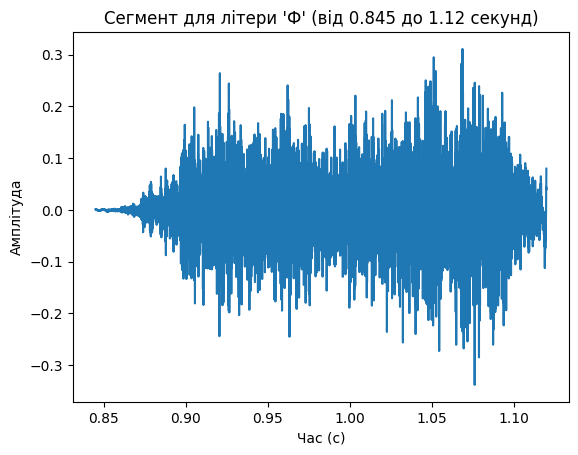

Літера 'о': RMS шум = 0.37877658872173836


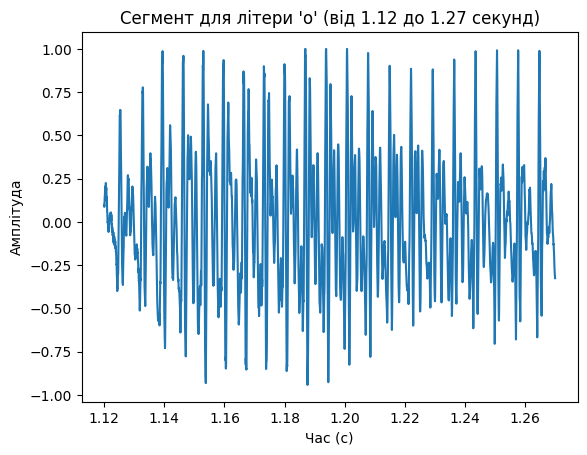

Літера 'р': RMS шум = 0.1571505896467585


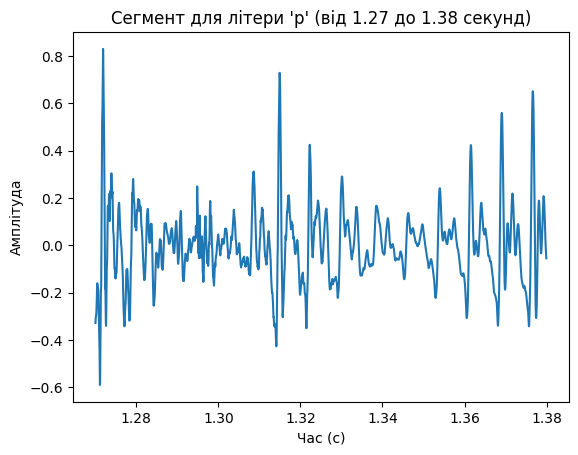

Літера 'о ': RMS шум = 0.20060771457820534


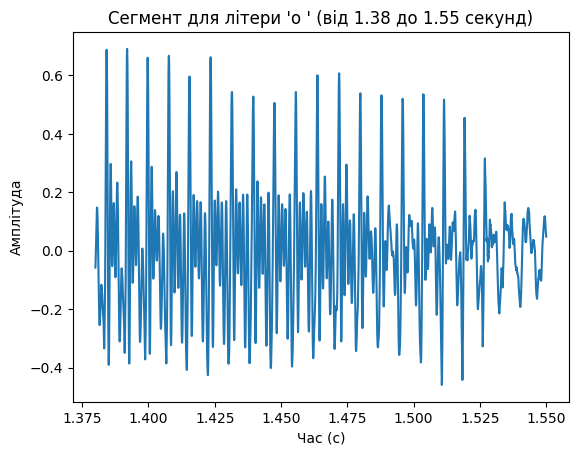

Літера 'щ': RMS шум = 0.07007140006363348


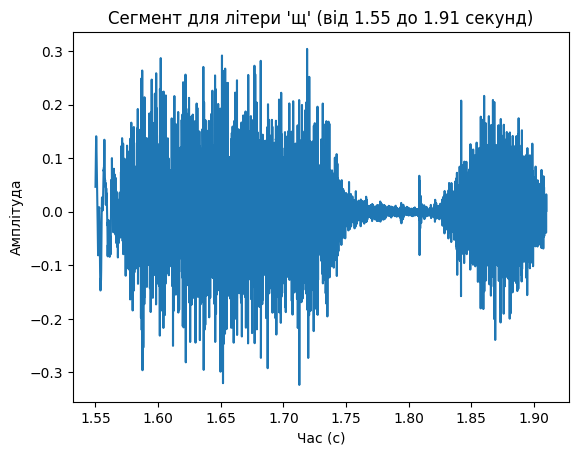

Літера 'а': RMS шум = 0.09149273144209318


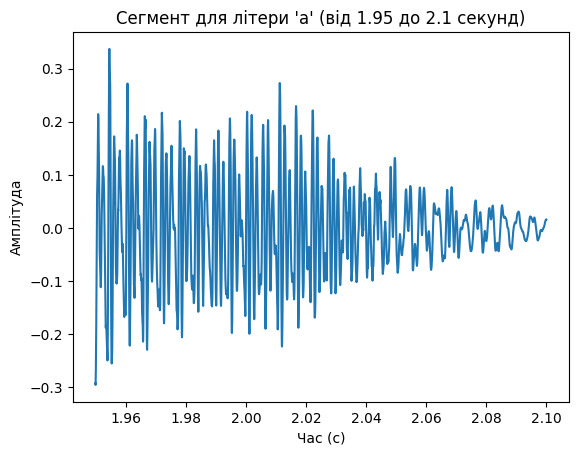

Літера 'В': RMS шум = 0.04273375832049393


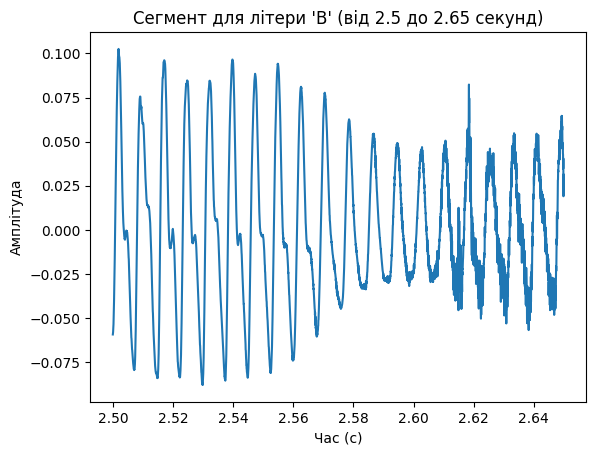

Літера 'л': RMS шум = 0.08628327773660269


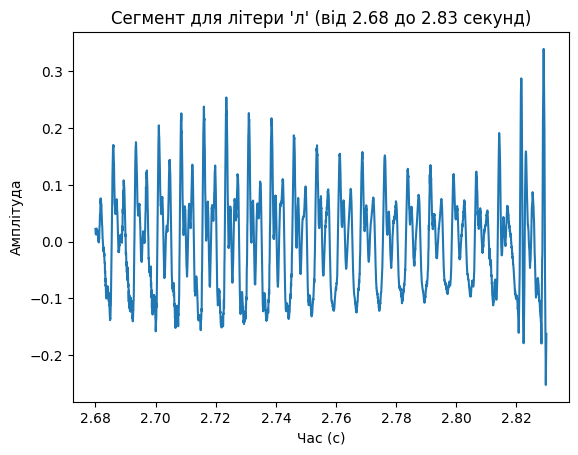

Літера 'а ': RMS шум = 0.1095207840495954


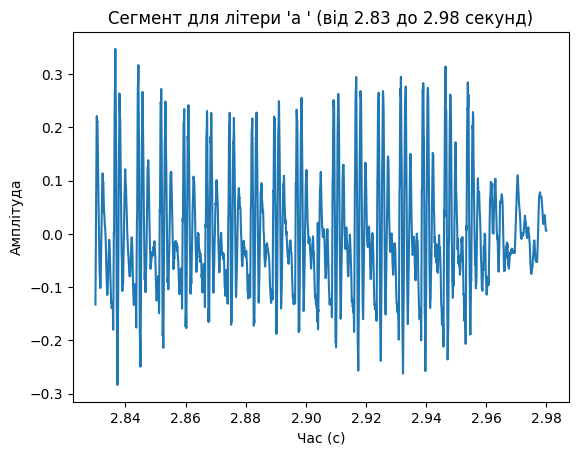

Літера 'д': RMS шум = 0.057486242879226754


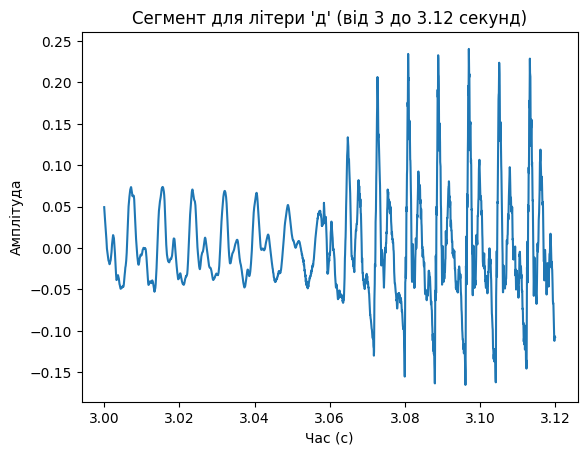

Літера 'и': RMS шум = 0.05666085039932356


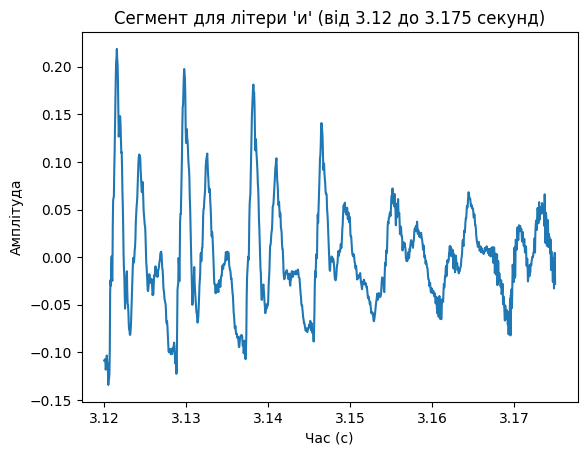

Літера 'с': RMS шум = 0.04798669926769182


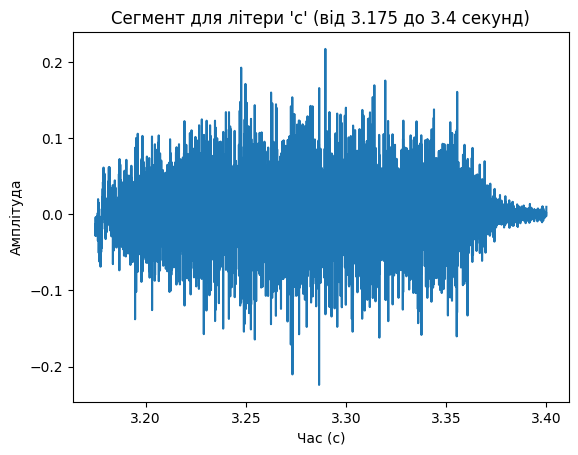

Літера 'л ': RMS шум = 0.03948467429264584


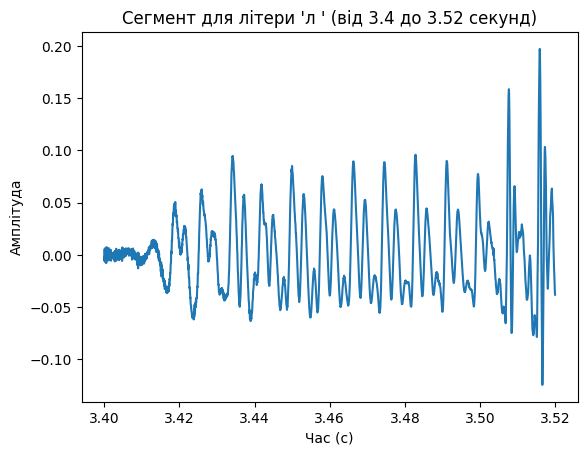

Літера 'а  ': RMS шум = 0.071869007954044


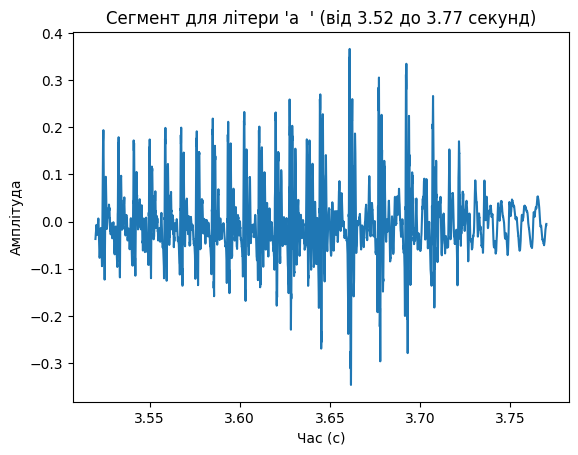

Літера 'в': RMS шум = 0.01389893283251176


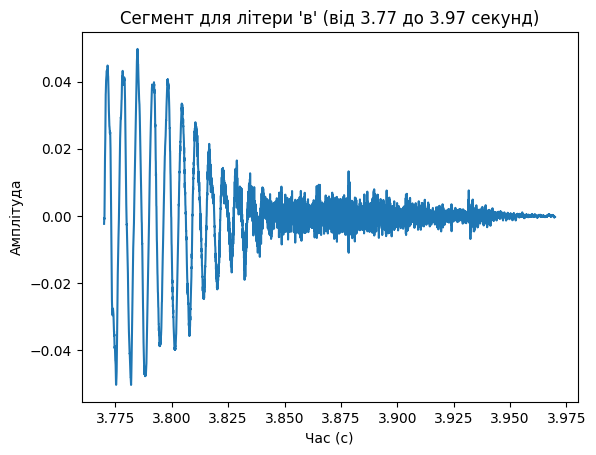

Літера 'О': RMS шум = 0.09922004413094154


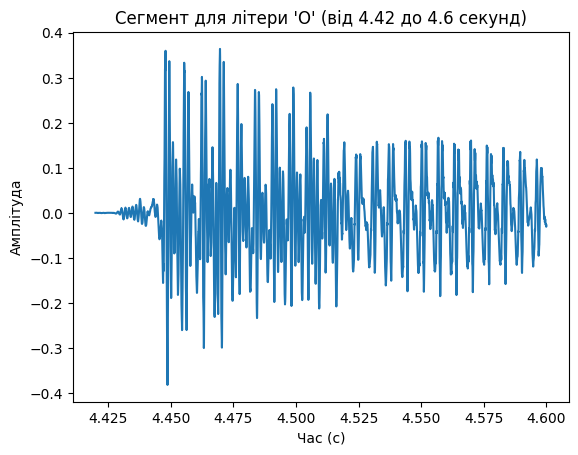

Літера 'л  ': RMS шум = 0.04695705460199702


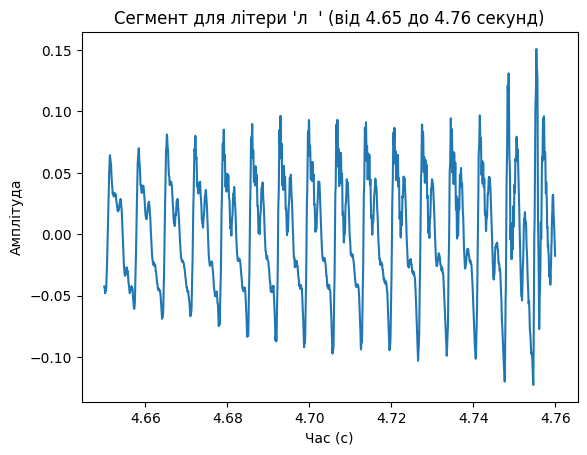

Літера 'е': RMS шум = 0.039240091375083344


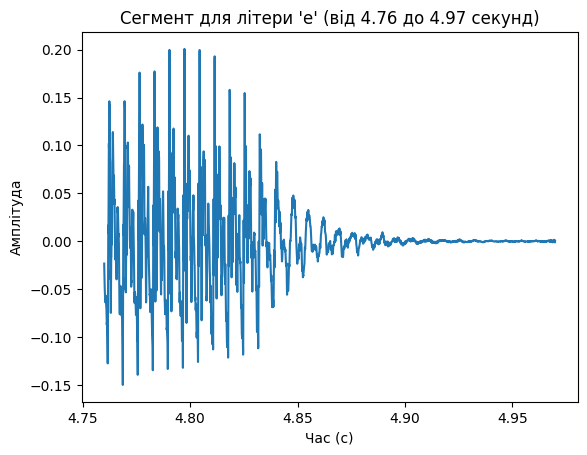

Літера 'к': RMS шум = 0.019505454752588972


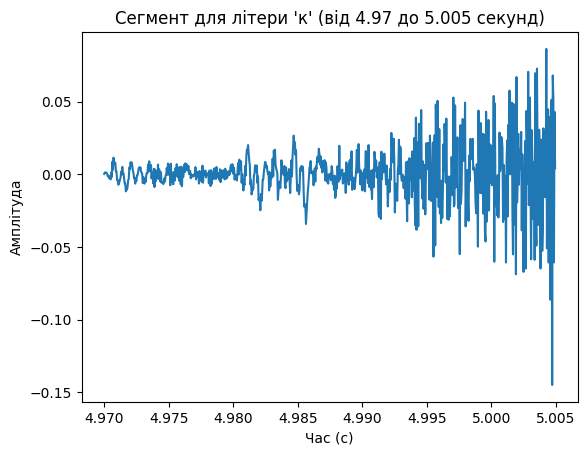

Літера 'с ': RMS шум = 0.09658488423110517


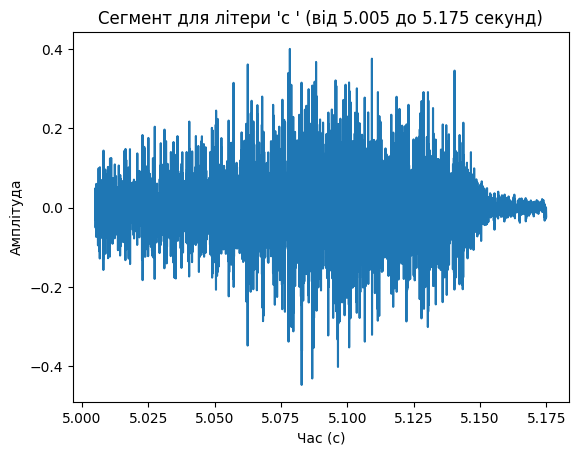

Літера 'а   ': RMS шум = 0.09302763005661639


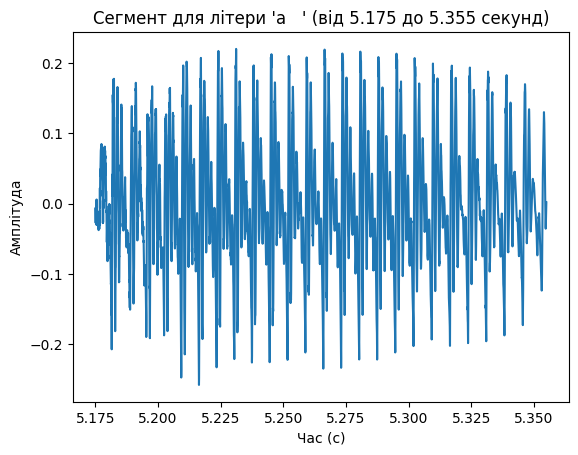

Літера 'н': RMS шум = 0.0383620489869517


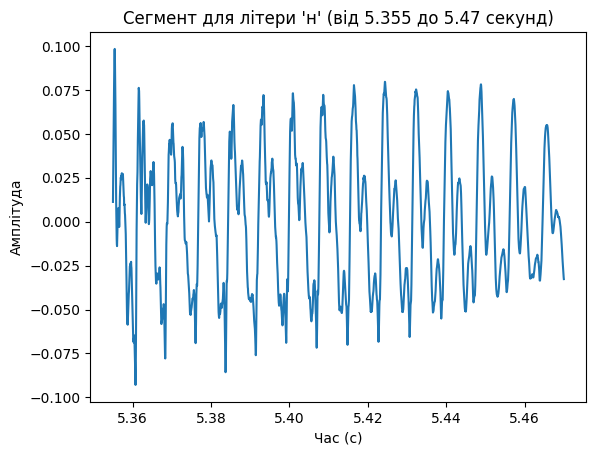

Літера 'д ': RMS шум = 0.02784037843540989


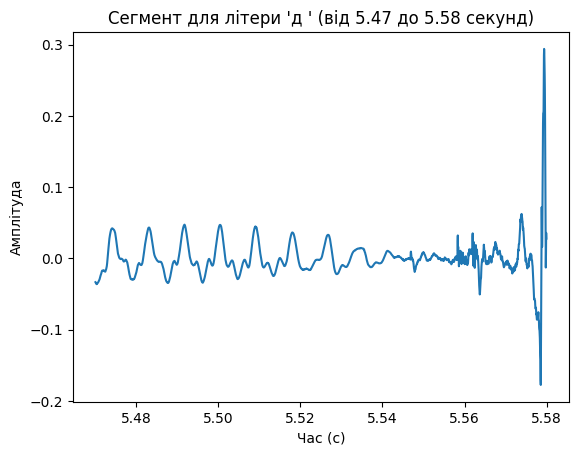

Літера 'р ': RMS шум = 0.05622304451983699


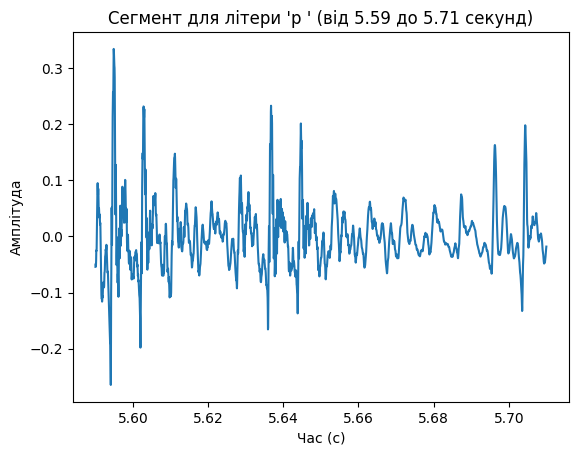

Літера 'о  ': RMS шум = 0.05599943328602217


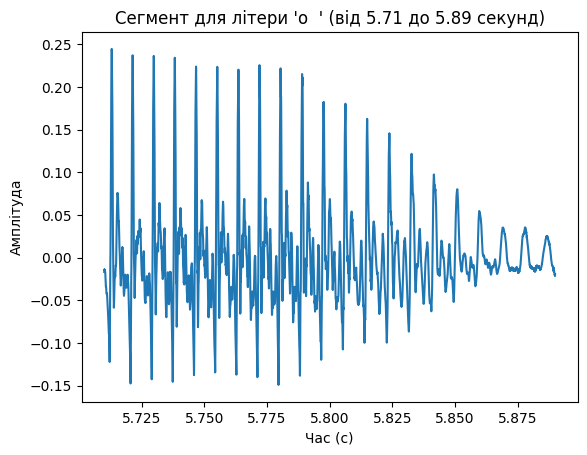

Літера 'в ': RMS шум = 0.039315500299222025


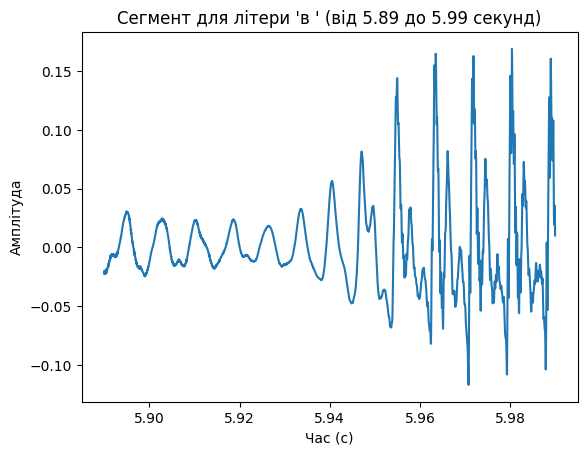

Літера 'и ': RMS шум = 0.03258987329198391


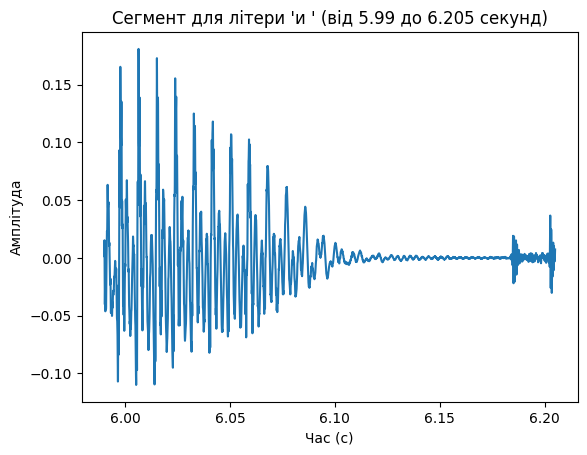

Літера 'ч': RMS шум = 0.021053273350869723


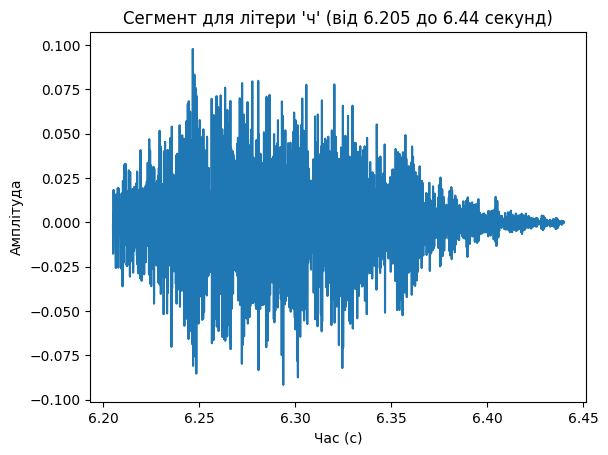

In [267]:
for letter, (start, end) in letter_intervals.items():
    segment = wave.segment(start=start, duration=(end - start))
    rms_noise = np.sqrt(np.mean(segment.ys**2))
    print(f"Літера '{letter}': RMS шум = {rms_noise}")

    segment.plot()
    plt.ylabel("Амплітуда")
    plt.xlabel("Час (c)")
    plt.title(f"Сегмент для літери '{letter}' (від {start} до {end} секунд)")
    plt.show()

Візуалізуємо інтервали складів та літер

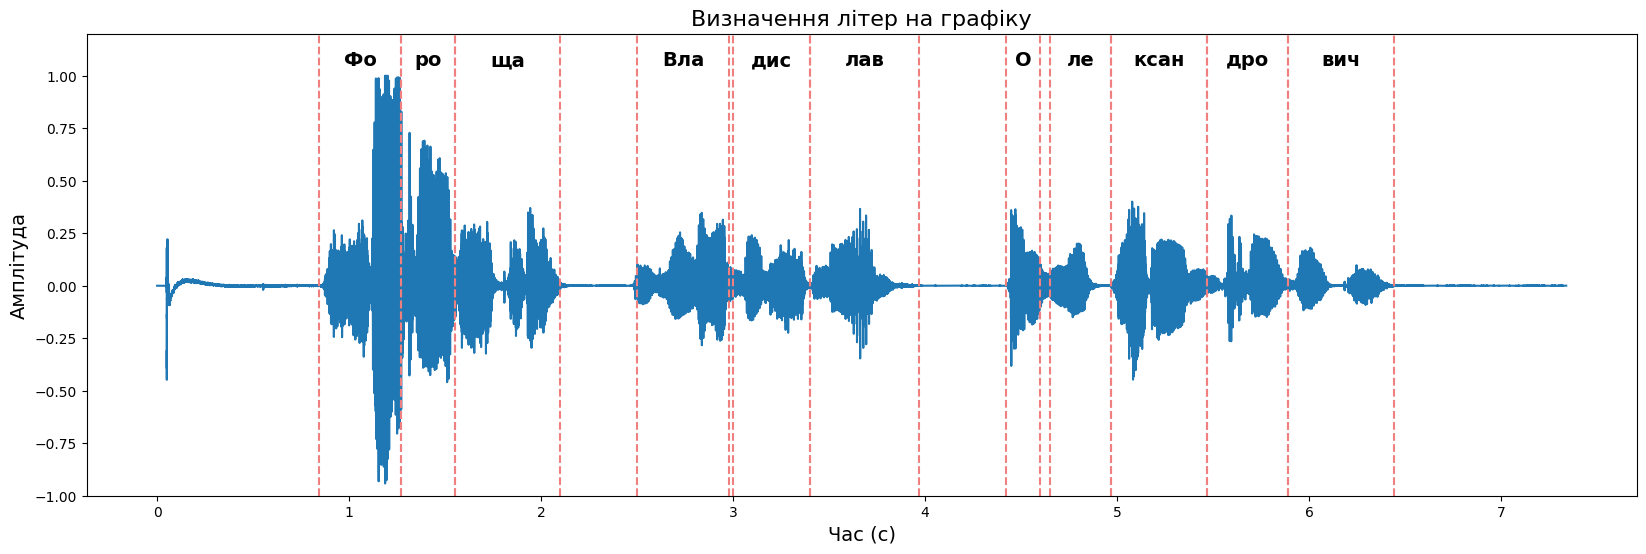

In [268]:
plt.figure(figsize=(20, 6))
wave.plot()
plt.title("Визначення літер на графіку", fontsize=16)
plt.xlabel("Час (с)", fontsize=14)
plt.ylabel("Амплітуда", fontsize=14)

for syllable, (start, end) in syllable_intervals.items():
    plt.axvline(x=start, color='lightcoral', linestyle='--')
    plt.axvline(x=end, color='lightcoral', linestyle='--')
    mid_point = (start + end) / 2
    plt.text(mid_point, 1.05 * np.max(wave.ys), syllable,
             ha='center', color='black', fontsize=14, fontweight='bold')

plt.ylim(-1, 1.2)
plt.show()

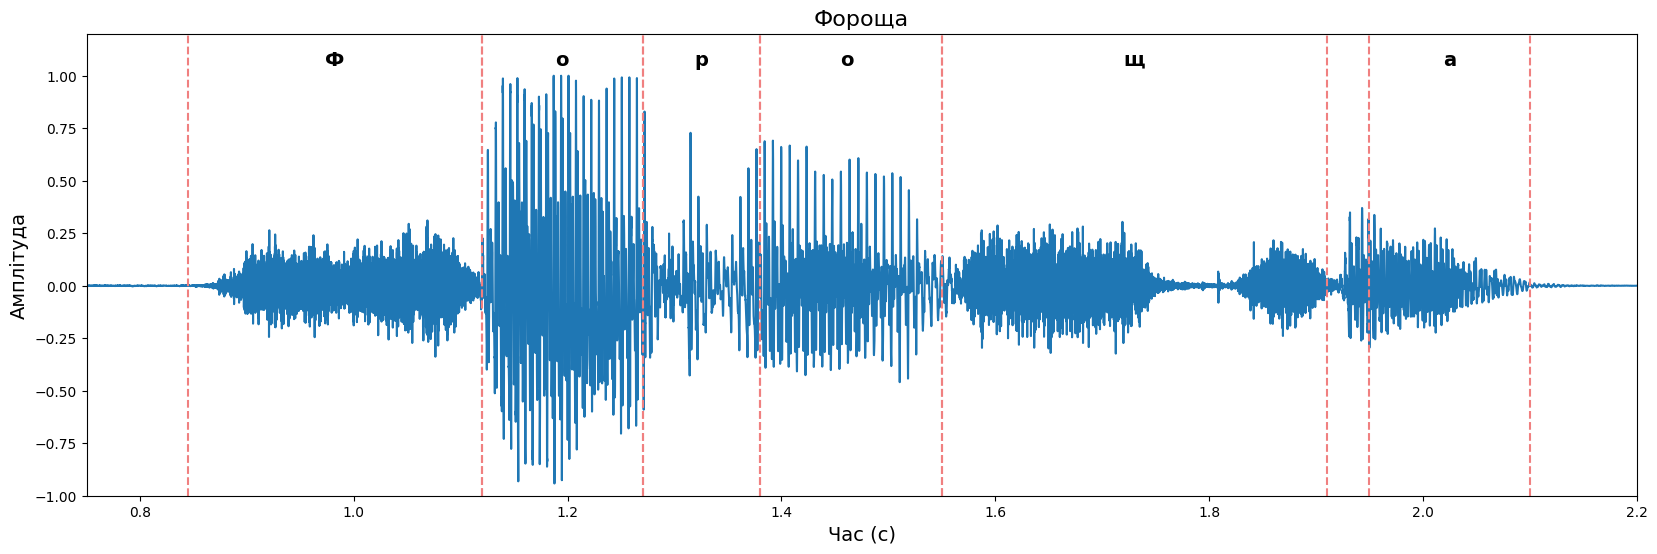

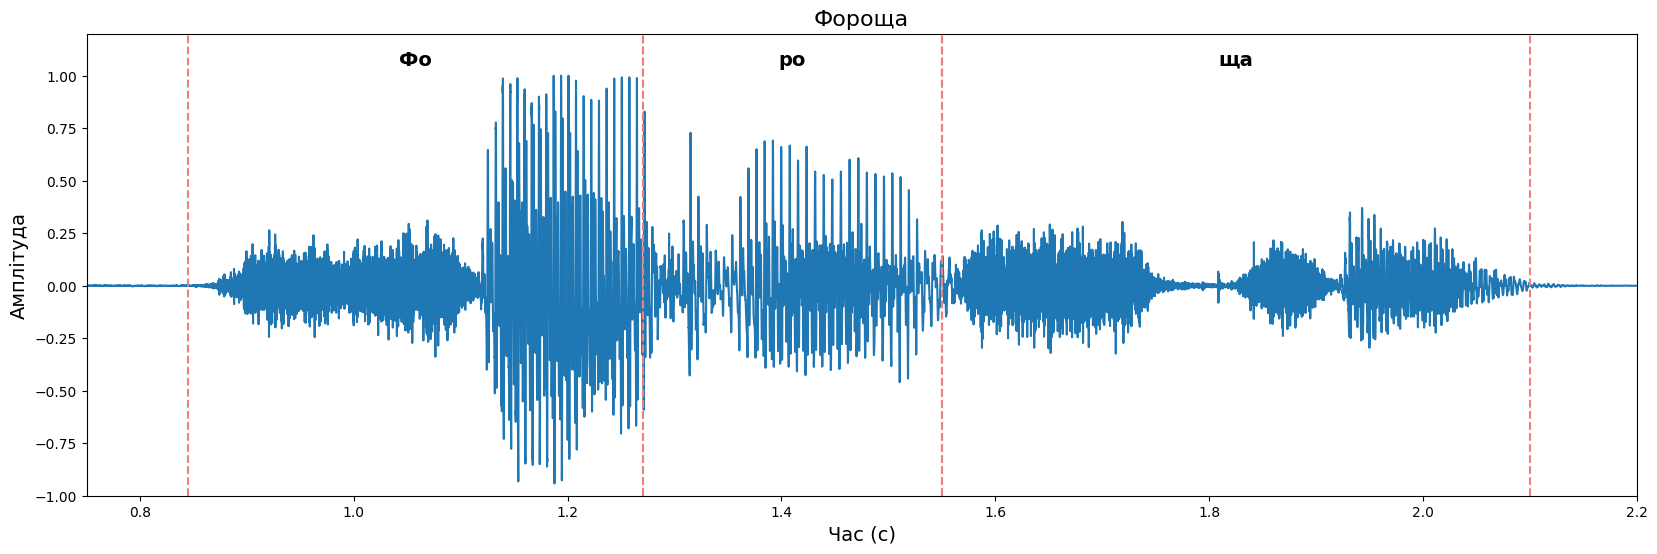

In [269]:
letter_intervals_surname = {
    "Ф": (0.845, 1.12), 
    "о": (1.12, 1.27),
    "р": (1.27, 1.38),
    "о ": (1.38, 1.55),
    "щ": (1.55, 1.91),
    "а": (1.95, 2.1),
}

start_interval = 0.75
end_interval = 2.2

plt.figure(figsize=(20, 6))
wave.plot()
plt.title("Фороща", fontsize=16)
plt.xlabel("Час (с)", fontsize=14)
plt.ylabel("Амплітуда", fontsize=14)
plt.xlim(start_interval, end_interval)

for letter, (start, end) in letter_intervals_surname.items():
    if start >= start_interval and end <= end_interval:
        plt.axvline(x=start, color='lightcoral', linestyle='--')
        plt.axvline(x=end, color='lightcoral', linestyle='--')
        mid_point = (start + end) / 2
        plt.text(mid_point, 1.05 * np.max(wave.ys), letter,
                 ha='center', color='black', fontsize=14, fontweight='bold')

plt.ylim(-1, 1.2)
plt.show()

plt.figure(figsize=(20, 6))
wave.plot()
plt.title("Фороща", fontsize=16)
plt.xlabel("Час (с)", fontsize=14)
plt.ylabel("Амплітуда", fontsize=14)
plt.xlim(start_interval, end_interval)

for syllable, (start, end) in syllable_intervals.items():
    if start >= start_interval and end <= end_interval:
        plt.axvline(x=start, color='lightcoral', linestyle='--')
        plt.axvline(x=end, color='lightcoral', linestyle='--')
        mid_point = (start + end) / 2
        plt.text(mid_point, 1.05 * np.max(wave.ys), syllable,
                 ha='center', color='black', fontsize=14, fontweight='bold')

plt.ylim(-1, 1.2)
plt.show()

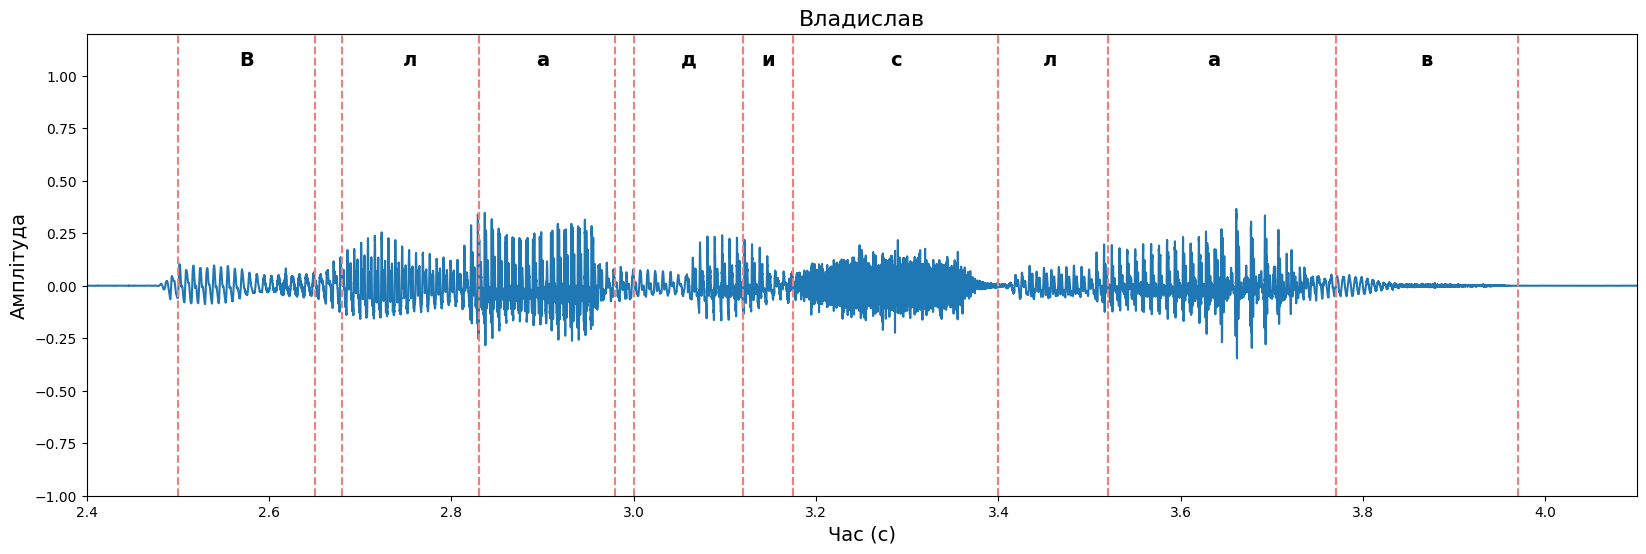

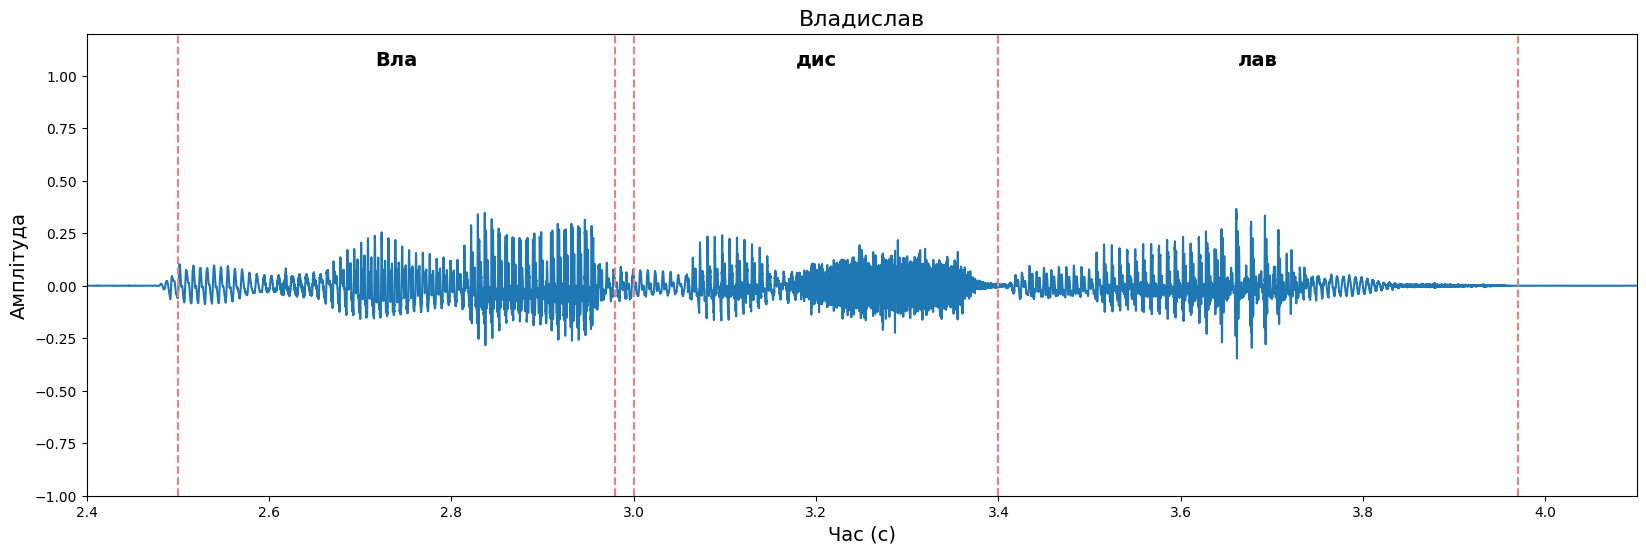

In [270]:
letter_intervals_name = {
    "В": (2.5, 2.65),
    "л": (2.68, 2.83),
    "а ": (2.83, 2.98),
    "д": (3, 3.12),
    "и": (3.12, 3.175),
    "с": (3.175, 3.4),
    "л ": (3.4, 3.52),
    "а  ": (3.52, 3.77),
    "в": (3.77, 3.97),
}

start_interval = 2.4
end_interval = 4.1

plt.figure(figsize=(20, 6))
wave.plot()
plt.title("Владислав", fontsize=16)
plt.xlabel("Час (с)", fontsize=14)
plt.ylabel("Амплітуда", fontsize=14)
plt.xlim(start_interval, end_interval)

for letter, (start, end) in letter_intervals_name.items():
    if start >= start_interval and end <= end_interval:
        plt.axvline(x=start, color='lightcoral', linestyle='--')
        plt.axvline(x=end, color='lightcoral', linestyle='--')
        mid_point = (start + end) / 2
        plt.text(mid_point, 1.05 * np.max(wave.ys), letter,
                 ha='center', color='black', fontsize=14, fontweight='bold')

plt.ylim(-1, 1.2)
plt.show()

plt.figure(figsize=(20, 6))
wave.plot()
plt.title("Владислав", fontsize=16)
plt.xlabel("Час (с)", fontsize=14)
plt.ylabel("Амплітуда", fontsize=14)
plt.xlim(start_interval, end_interval)

for syllable, (start, end) in syllable_intervals.items():
    if start >= start_interval and end <= end_interval:
        plt.axvline(x=start, color='lightcoral', linestyle='--')
        plt.axvline(x=end, color='lightcoral', linestyle='--')
        mid_point = (start + end) / 2
        plt.text(mid_point, 1.05 * np.max(wave.ys), syllable,
                 ha='center', color='black', fontsize=14, fontweight='bold')

plt.ylim(-1, 1.2)
plt.show()

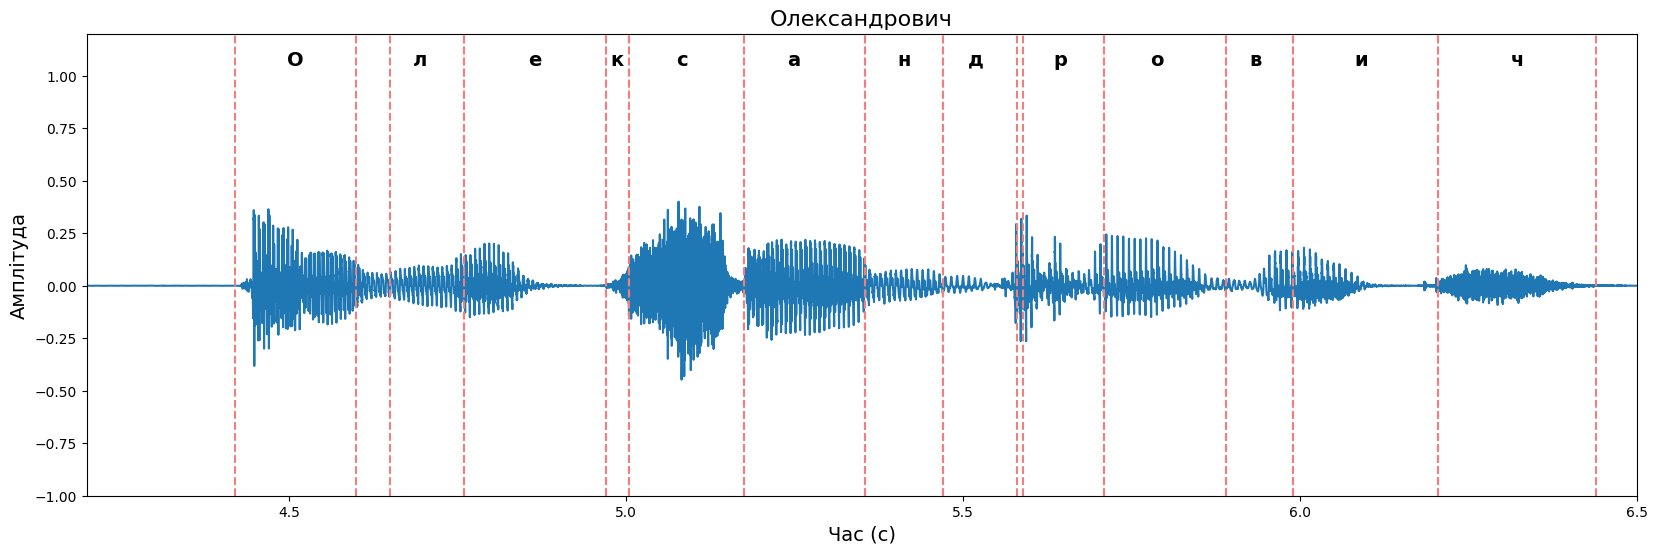

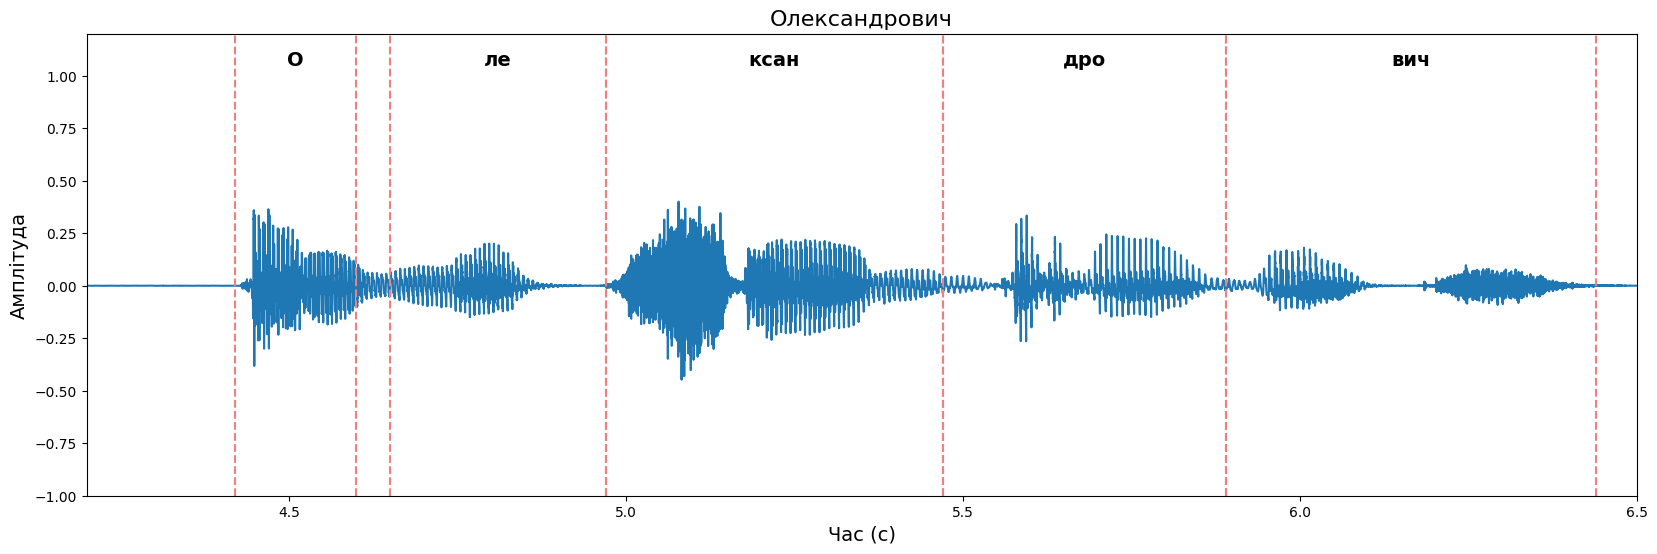

In [272]:
letter_intervals_middlename = {
    "О": (4.42, 4.6),
    "л  ": (4.65, 4.76),
    "е": (4.76, 4.97),
    "к": (4.97, 5.005),
    "с ": (5.005, 5.175),
    "а   ": (5.175, 5.355),
    "н": (5.355, 5.47),
    "д ": (5.47, 5.58),
    "р ": (5.59, 5.71),
    "о  ": (5.71, 5.89),
    "в ": (5.89, 5.99),
    "и ": (5.99, 6.205),
    "ч": (6.205, 6.44)
}

start_interval = 4.2
end_interval = 6.5

plt.figure(figsize=(20, 6))
wave.plot()
plt.title("Олександрович", fontsize=16)
plt.xlabel("Час (с)", fontsize=14)
plt.ylabel("Амплітуда", fontsize=14)
plt.xlim(start_interval, end_interval)

for letter, (start, end) in letter_intervals_middlename.items():
    if start >= start_interval and end <= end_interval:
        plt.axvline(x=start, color='lightcoral', linestyle='--')
        plt.axvline(x=end, color='lightcoral', linestyle='--')
        mid_point = (start + end) / 2
        plt.text(mid_point, 1.05 * np.max(wave.ys), letter,
                 ha='center', color='black', fontsize=14, fontweight='bold')

plt.ylim(-1, 1.2)
plt.show()

plt.figure(figsize=(20, 6))
wave.plot()
plt.title("Олександрович", fontsize=16)
plt.xlabel("Час (с)", fontsize=14)
plt.ylabel("Амплітуда", fontsize=14)
plt.xlim(start_interval, end_interval)

for syllable, (start, end) in syllable_intervals.items():
    if start >= start_interval and end <= end_interval:
        plt.axvline(x=start, color='lightcoral', linestyle='--')
        plt.axvline(x=end, color='lightcoral', linestyle='--')
        mid_point = (start + end) / 2
        plt.text(mid_point, 1.05 * np.max(wave.ys), syllable,
                 ha='center', color='black', fontsize=14, fontweight='bold')

plt.ylim(-1, 1.2)
plt.show()